In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read POI metrics data
df = pd.read_csv('poi_metrics.csv')

# Drop rows where 'blast_bat_speed_mph_x' or any of the features used in X are missing
df_clean = df.dropna(subset=['blast_bat_speed_mph_x',])

In [3]:


# Define X (independent variable) and y (dependent variable) 
X = df_clean[['rear_shoulder_stride_max_y']]  # Adjust for multiple angles if necessary
y = df_clean['blast_bat_speed_mph_x']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients and R^2 score
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R^2 Score:", model.score(X, y))

# Calculate and print averages
average_angle = df_clean['rear_shoulder_stride_max_y'].mean()
average_batspeed = df_clean['blast_bat_speed_mph_x'].mean()

print("Rear Shoulder Stride Max y Avg:", average_angle)
print("Bat Speed Avg:", average_batspeed)

Intercept: 64.13692431230275
Coefficients: [0.05011518]
R^2 Score: 0.011008675299194914
Rear Shoulder Stride Max y Avg: 81.28755193199382
Bat Speed Avg: 68.21066460587326


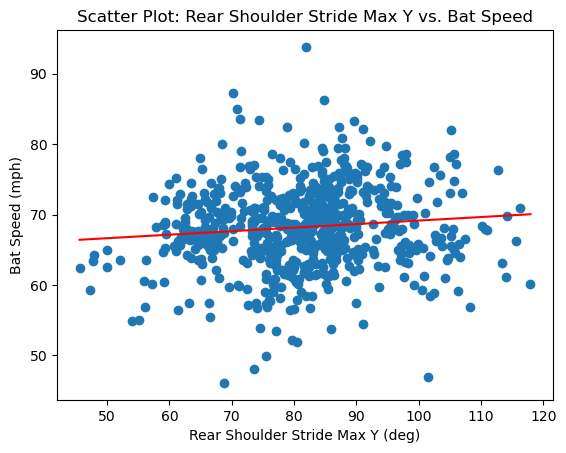

In [4]:
# Generate regression line
x_fit = np.linspace(df_clean['rear_shoulder_stride_max_y'].min(), df_clean['rear_shoulder_stride_max_y'].max(), 100)
y_fit = model.intercept_ + model.coef_[0] * x_fit

# Plot regression line
plt.plot(x_fit, y_fit, color='red', label=f'Regression Line: y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x')
# Scatter plot for shoulder y feature against bat speed
plt.scatter(df_clean['rear_shoulder_stride_max_y'], df_clean['blast_bat_speed_mph_x'])
plt.xlabel('Rear Shoulder Stride Max Y (deg)')
plt.ylabel('Bat Speed (mph)')
plt.title('Scatter Plot: Rear Shoulder Stride Max Y vs. Bat Speed')
plt.show()

In [5]:
# Create absolute difference from 90 degrees
df_clean['abs_diff_90'] = abs(df_clean['rear_shoulder_stride_max_y'] - 90)

# Define X and y
X = df_clean[['abs_diff_90']]
y = df_clean['blast_bat_speed_mph_x']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])  # Should be negative if closer to 90 is better
print("R^2 Score:", model.score(X, y))

Intercept: 69.63153361576865
Coefficient: -0.11520667195536421
R^2 Score: 0.029714786235989


<positron-console-cell-5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


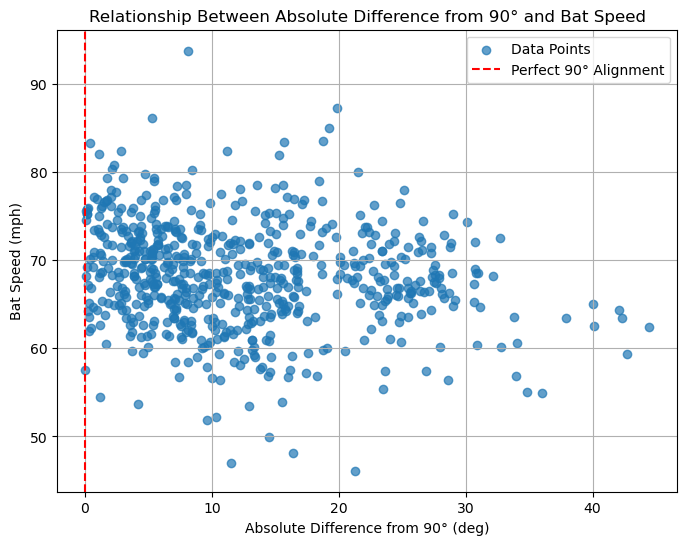

In [6]:
# Scatter plot of absolute difference from 90 degrees vs. bat speed
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['abs_diff_90'], df_clean['blast_bat_speed_mph_x'], alpha=0.7, label='Data Points')
plt.xlabel('Absolute Difference from 90° (deg)')
plt.ylabel('Bat Speed (mph)')
plt.title('Relationship Between Absolute Difference from 90° and Bat Speed')
plt.axvline(x=0, color='red', linestyle='--', label='Perfect 90° Alignment')
plt.legend()
plt.grid(True)
plt.show()